In [1]:
library(statnet)
library(stats)

Loading required package: tergm

Loading required package: ergm

Loading required package: network

network: Classes for Relational Data
Version 1.16.1 created on 2020-10-06.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
                    Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Martina Morris, University of Washington
                    Skye Bender-deMoll, University of Washington
 For citation information, type citation("network").
 Type help("network-package") to get started.



ergm: version 3.11.0, created on 2020-10-14
Copyright (c) 2020, Mark S. Handcock, University of California -- Los Angeles
                    David R. Hunter, Penn State University
                    Carter T. Butts, University of California -- Irvine
                    Steven M. Goodreau, University of Washington
                    Pavel N. Krivitsky, UNSW Sydney
                    M

               Installed ReposVer Built  
EpiModel       "2.0.3"   "2.1.0"  "4.0.5"
ergm           "3.11.0"  "4.1.2"  "4.0.5"
ergm.count     "3.4.0"   "4.0.2"  "4.0.5"
ergm.ego       "0.6.1"   "1.0.0"  "4.0.5"
ergm.rank      "1.2.0"   "4.0.0"  "4.0.5"
ndtv           "0.13.0"  "0.13.1" "4.0.5"
network        "1.16.1"  "1.17.1" "4.0.5"
networkDynamic "0.10.1"  "0.11.0" "4.0.5"
statnet.common "4.4.1"   "4.5.0"  "4.0.5"
tergm          "3.7.0"   "4.0.2"  "4.0.5"


Restart R and use "statnet::update_statnet()" to get the updates.



In [2]:
el_dist = read.csv("../data/common/dist.csv", stringsAsFactors = FALSE)
el_dist$log_dist = log(el_dist$dist)
dist_net = network(el_dist, directed = TRUE, matrix.type = "edgelist")
set.edge.value(dist_net, "dist", el_dist$dist)
set.edge.value(dist_net, "log_dist", el_dist$log_dist)
dist_net

 Network attributes:
  vertices = 174 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 30276 
    missing edges= 0 
    non-missing edges= 30276 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [3]:
el_diplomatic = read.csv("../data/2011/features/dip_exhange_clean.csv", stringsAsFactors = FALSE)
diplomatic_exchange_net = network(el_diplomatic, directed = TRUE, matrix.type = "edgelist")
diplomatic_exchange_net

 Network attributes:
  vertices = 174 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 7850 
    missing edges= 0 
    non-missing edges= 7850 

 Vertex attribute names: 
    vertex.names 

 Edge attribute names not shown 

In [4]:
el = read.csv("../data/2011/edgelist.csv", stringsAsFactors = FALSE)
nl = read.csv("../data/2011/nodelist.csv", stringsAsFactors = FALSE)

In [5]:
nl$gdp_us_dollar <- log(nl$gdp_us_dollar)
nl$area <- log(nl$area)
nl$population <- log(nl$population)
nl$gdp_per_capita <- log(nl$gdp_per_capita)

In [6]:
nl$gdp_us_dollar = as.numeric(scale(nl$gdp_us_dollar))
nl$gdp_growth = as.numeric(scale(nl$gdp_growth))
nl$inflation_rate = as.numeric(scale(nl$inflation_rate))
nl$population = as.numeric(scale(nl$population))
nl$gdp_per_capita = as.numeric(scale(nl$gdp_per_capita))
nl$agriculture_forestry_fishing_of_gdp = as.numeric(scale(nl$agriculture_forestry_fishing_of_gdp))
nl$industry_of_gdp = as.numeric(scale(nl$industry_of_gdp))
nl$merchandise_of_gdp = as.numeric(scale(nl$merchandise_of_gdp))
nl$net_barter_of_trade = as.numeric(scale(nl$net_barter_of_trade))
nl$foreign_direct_investment_inflows = as.numeric(scale(nl$foreign_direct_investment_inflows))

In [7]:
net = network(el, directed = TRUE, matrix.type = 'edgelist', vertex.attr=nl, vertex.attrnames=colnames(nl), ignore.eval = FALSE, names.eval='trade')
set.edge.value(net, "trade", el$weight)
net

 Network attributes:
  vertices = 174 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 3595 
    missing edges= 0 
    non-missing edges= 3595 

 Vertex attribute names: 
    agriculture_forestry_fishing_of_gdp area colonizer continent country_iso3 foreign_direct_investment_inflows gdp_growth gdp_per_capita gdp_us_dollar industry_of_gdp inflation_rate landlocked langoff_1 merchandise_of_gdp net_barter_of_trade population vertex.names 

 Edge attribute names not shown 

In [8]:
model = ergm(
                        net ~
                        edges +
                        mutual +
                        nodecov("gdp_us_dollar") +
                        absdiff("gdp_us_dollar") +
                        nodecov("inflation_rate") +
                        absdiff("inflation_rate") +
                        nodecov("gdp_growth") +
                        absdiff("gdp_growth") +
                        nodematch("colonizer") +
                        nodematch("continent") +
                        nodematch("landlocked") +
                        nodematch("langoff_1") +
                        edgecov(diplomatic_exchange_net) +
                        nodecov("population") +
                        nodecov("agriculture_forestry_fishing_of_gdp") +
                        nodecov("industry_of_gdp") +
                        nodecov("merchandise_of_gdp") +
                        nodecov("net_barter_of_trade") +
                        nodecov("foreign_direct_investment_inflows")
                )

Starting maximum pseudolikelihood estimation (MPLE):

Evaluating the predictor and response matrix.

Maximizing the pseudolikelihood.

Finished MPLE.

Starting Monte Carlo maximum likelihood estimation (MCMLE):

Iteration 1 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 1.027.

Step length converged once. Increasing MCMC sample size.

Iteration 2 of at most 20:

Optimizing with step length 1.

The log-likelihood improved by 0.4095.

Step length converged twice. Stopping.

Finished MCMLE.

Evaluating log-likelihood at the estimate. 
Using 20 bridges: 
1 
2 
3 
4 
5 
6 
7 
8 
9 
10 
11 
12 
13 
14 
15 
16 
17 
18 
19 
20 
.

This model was fit using MCMC.  To examine model diagnostics and check
for degeneracy, use the mcmc.diagnostics() function.



In [9]:
summary(model)

Call:
ergm(formula = net ~ edges + mutual + nodecov("gdp_us_dollar") + 
    absdiff("gdp_us_dollar") + nodecov("inflation_rate") + absdiff("inflation_rate") + 
    nodecov("gdp_growth") + absdiff("gdp_growth") + nodematch("colonizer") + 
    nodematch("continent") + nodematch("landlocked") + nodematch("langoff_1") + 
    edgecov(diplomatic_exchange_net) + nodecov("population") + 
    nodecov("agriculture_forestry_fishing_of_gdp") + nodecov("industry_of_gdp") + 
    nodecov("merchandise_of_gdp") + nodecov("net_barter_of_trade") + 
    nodecov("foreign_direct_investment_inflows"))

Iterations:  2 out of 20 

Monte Carlo MLE Results:
                                             Estimate Std. Error MCMC % z value
edges                                       -1.948791   0.062200      0 -31.331
mutual                                       0.297886   0.071213      0   4.183
nodecov.gdp_us_dollar                        0.051048   0.044139      0   1.157
absdiff.gdp_us_dollar                    

In [10]:
gof <- gof(model ~ model + distance + dspartners + odegree + idegree + triadcensus)

In [11]:
gof


Goodness-of-fit for model statistics 

                                                  obs        min       mean
edges                                       3594.0000 3447.00000 3596.43000
mutual                                       324.0000  286.00000  326.48000
nodecov.gdp_us_dollar                       -569.9575 -709.86497 -578.88845
absdiff.gdp_us_dollar                       4588.6487 4378.37371 4578.78325
nodecov.inflation_rate                      -149.1085 -288.53371 -134.43976
absdiff.inflation_rate                      3086.4781 2925.14584 3103.32879
nodecov.gdp_growth                           245.1728   98.49963  241.78430
absdiff.gdp_growth                          2456.0285 2296.27316 2462.46043
nodematch.colonizer                         1244.0000 1140.00000 1245.52000
nodematch.continent                          524.0000  472.00000  525.79000
nodematch.landlocked                        2208.0000 2110.00000 2208.93000
nodematch.langoff_1                          280

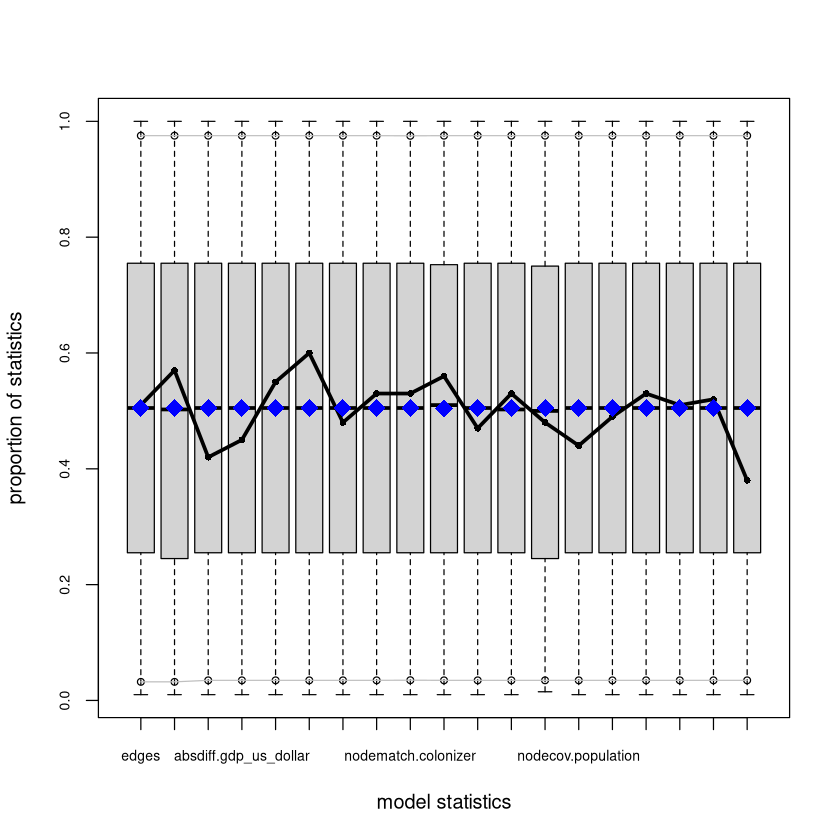

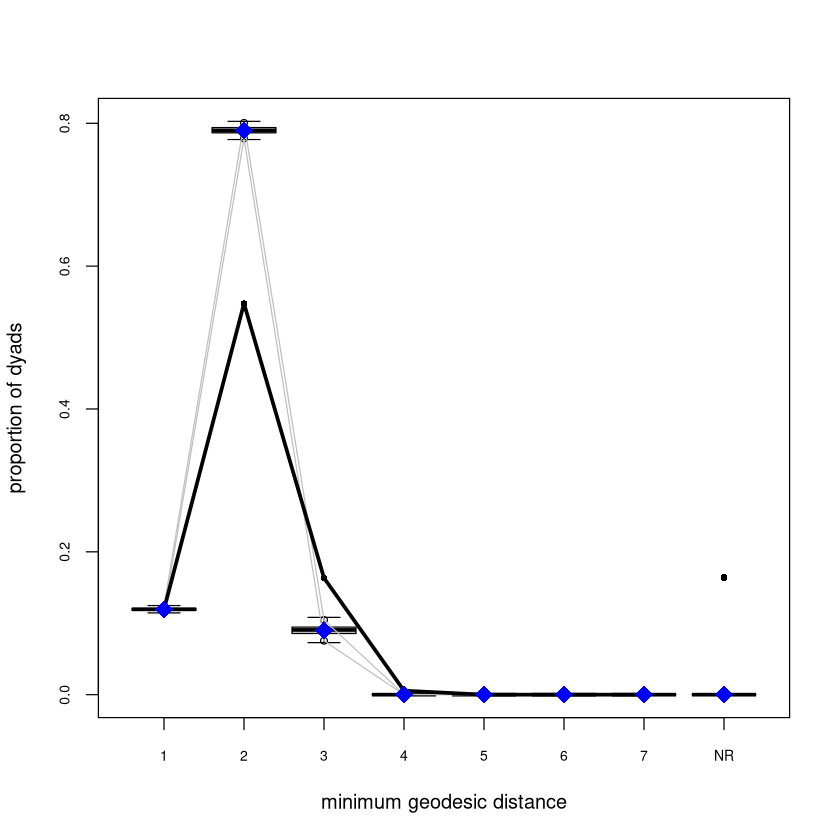

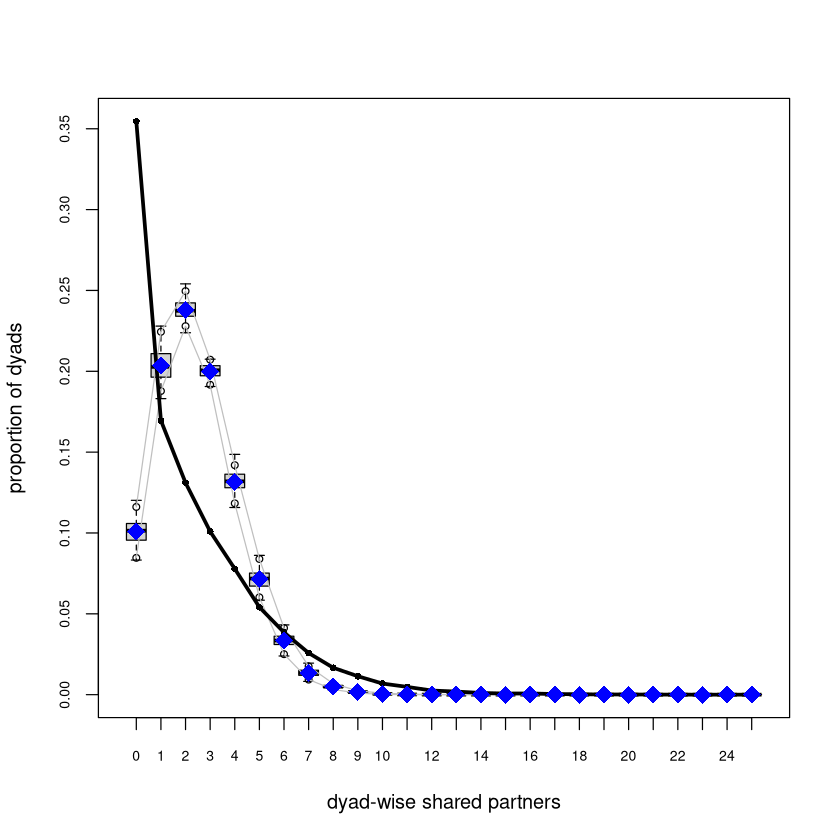

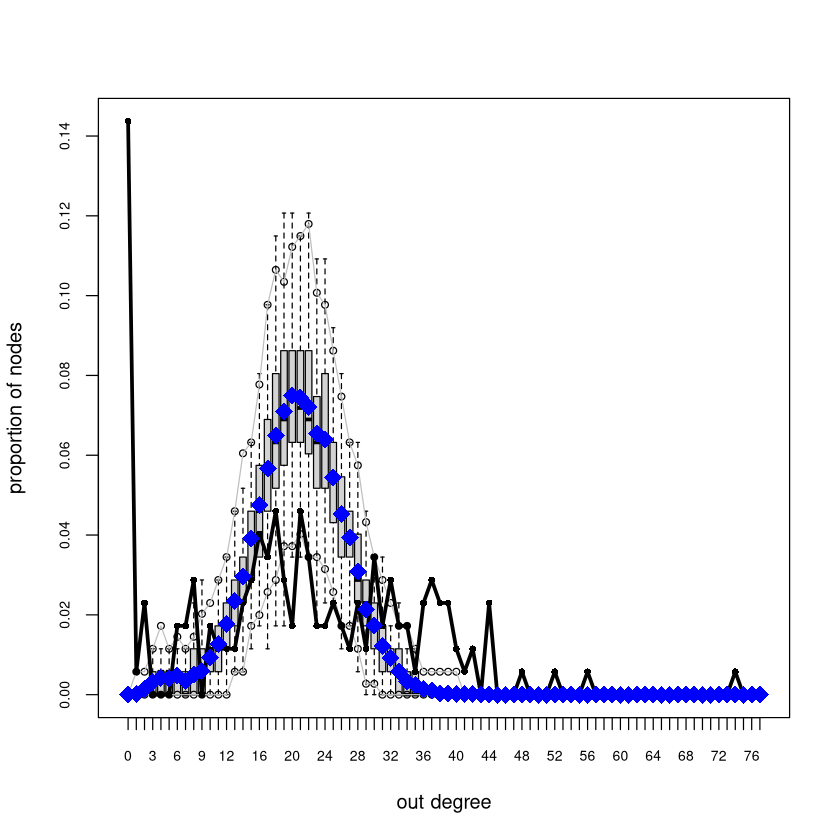

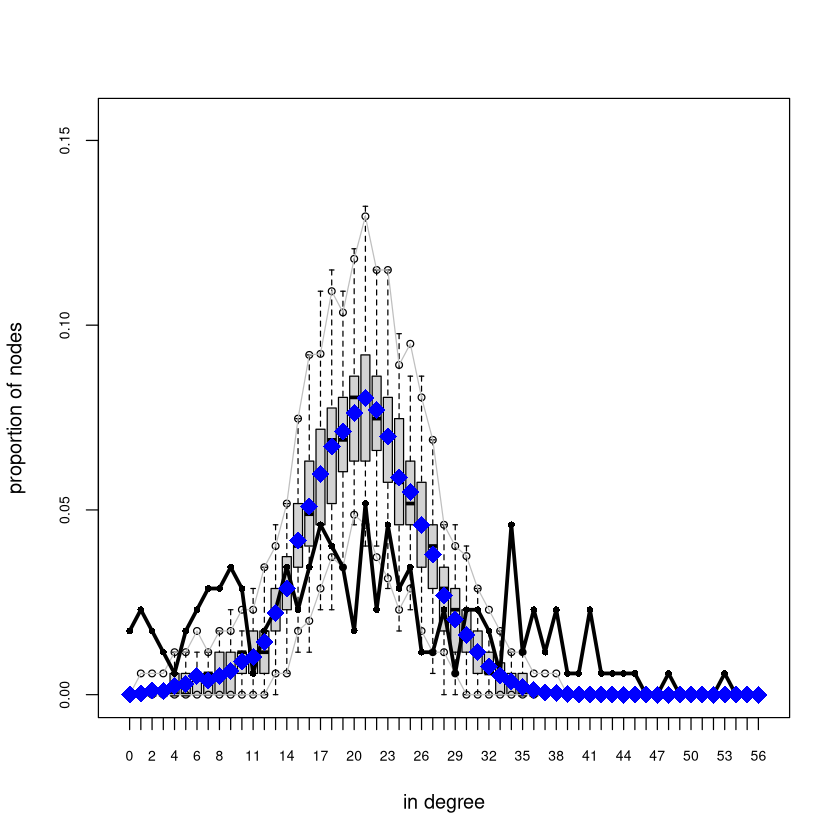

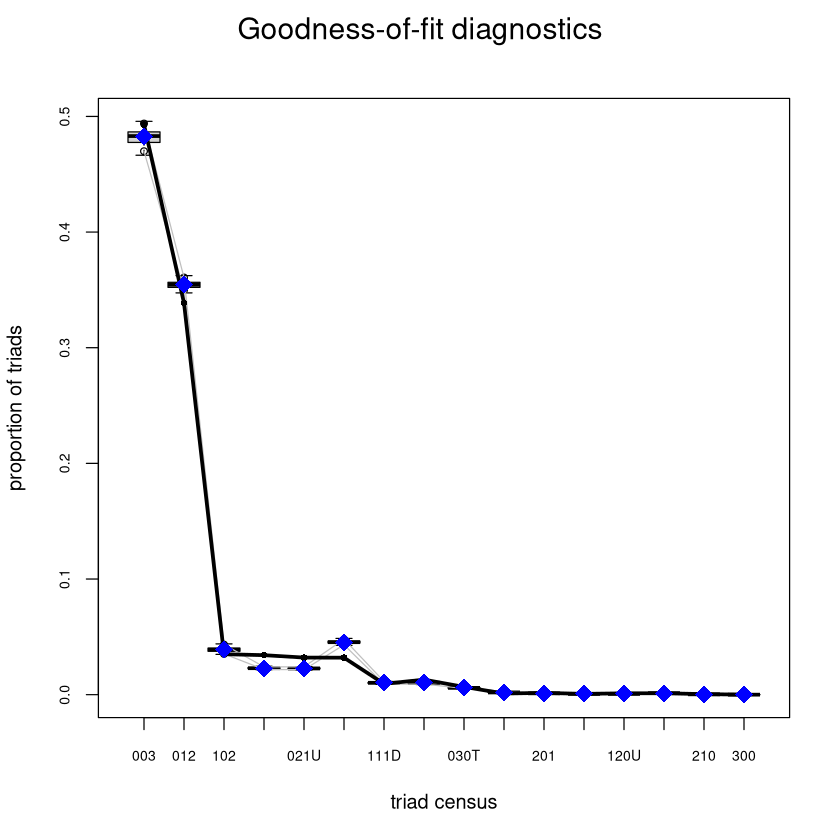

In [12]:
plot(gof)

Sample statistics summary:

Iterations = 16384:4209664
Thinning interval = 1024 
Number of chains = 1 
Sample size per chain = 4096 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

                                               Mean    SD Naive SE
edges                                       -15.045 57.46   0.8978
mutual                                       -1.528 17.56   0.2744
nodecov.gdp_us_dollar                        11.885 68.12   1.0643
absdiff.gdp_us_dollar                       -18.267 88.21   1.3782
nodecov.inflation_rate                       12.142 75.73   1.1833
absdiff.inflation_rate                       -3.479 79.18   1.2372
nodecov.gdp_growth                          -34.489 66.33   1.0364
absdiff.gdp_growth                           -2.769 67.17   1.0495
nodematch.colonizer                          -3.998 33.10   0.5171
nodematch.continent                          -8.172 21.97   0.3432
nodematch.landlocked            

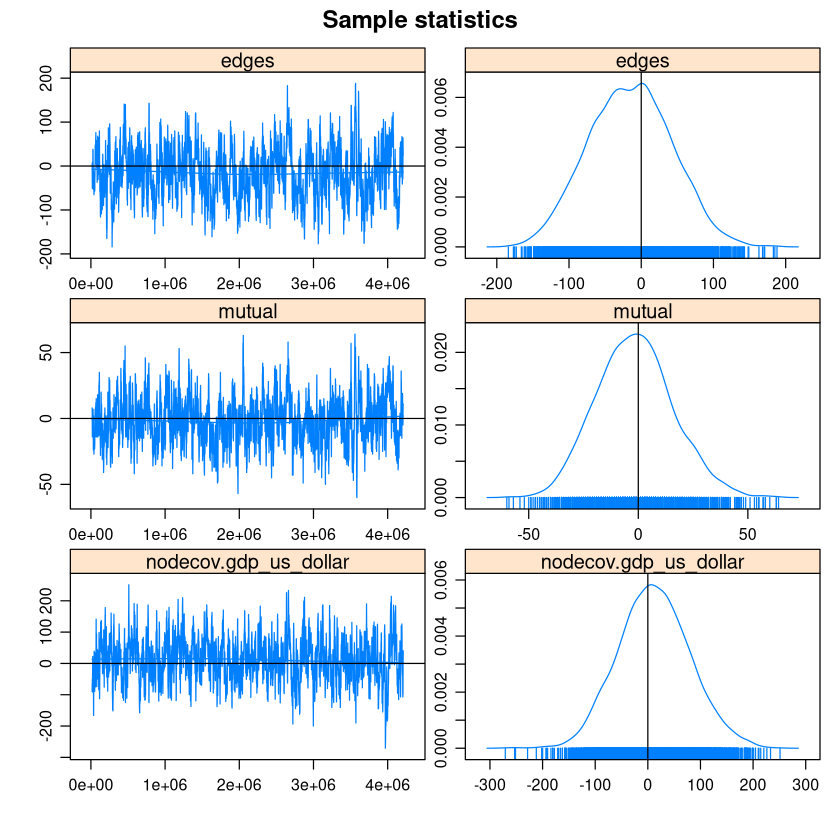

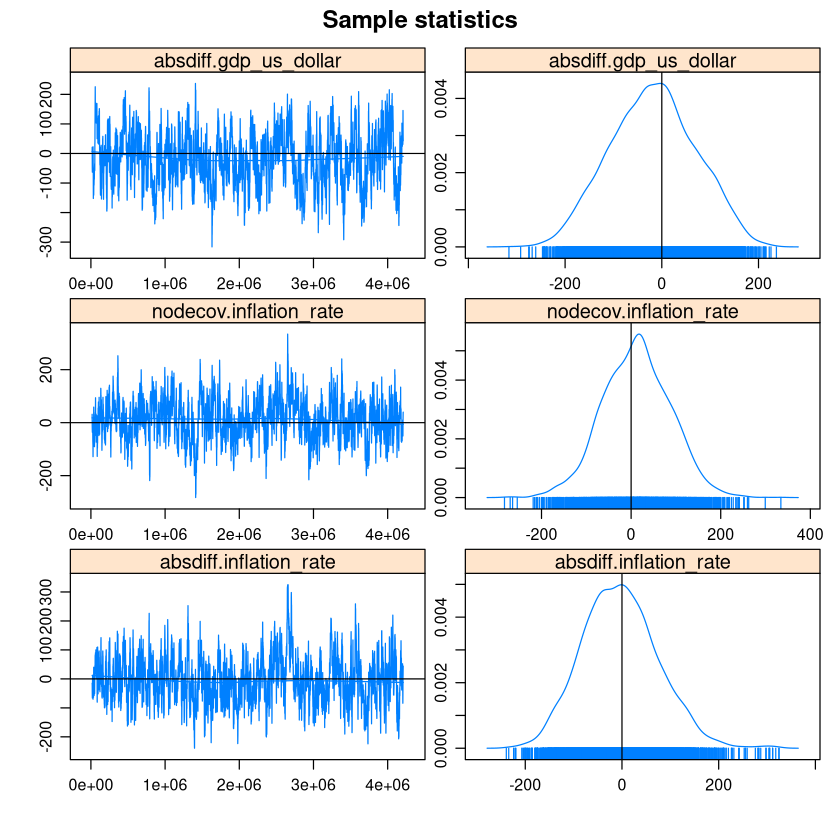

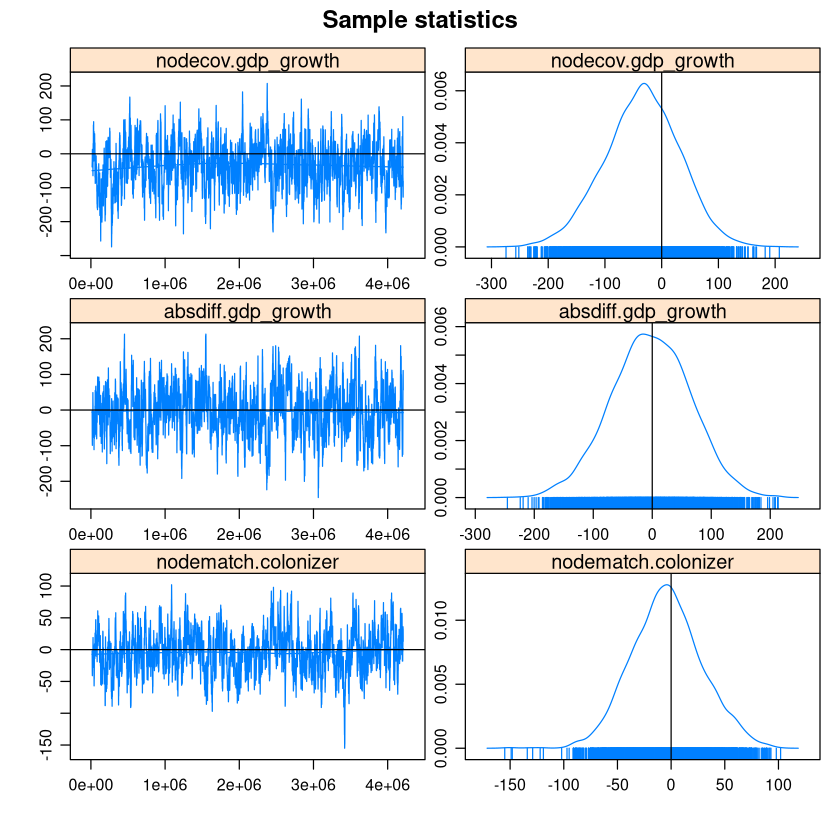

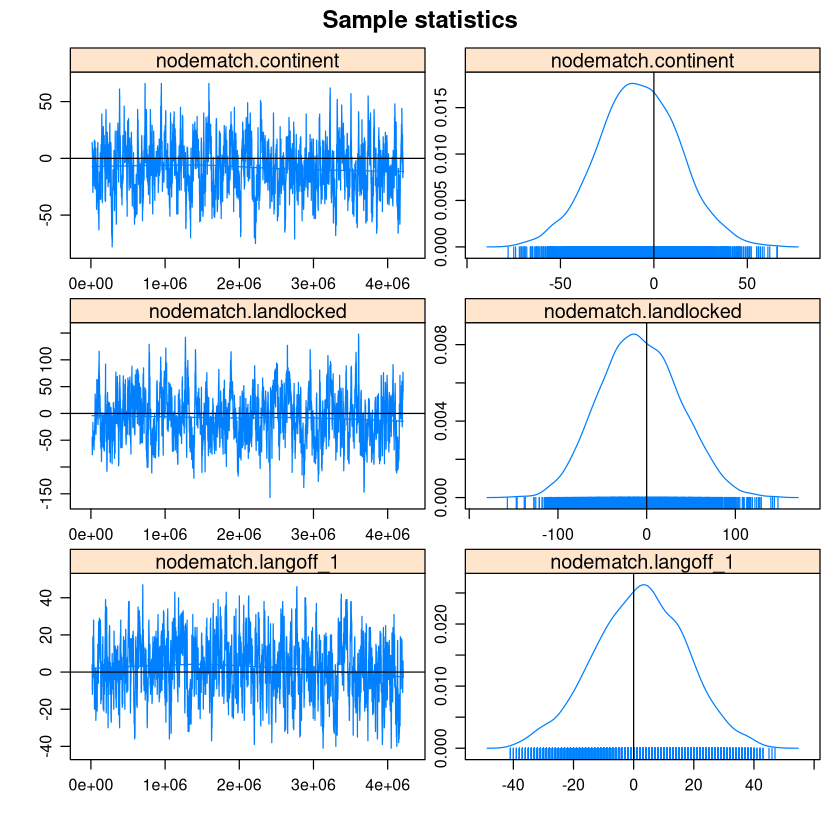

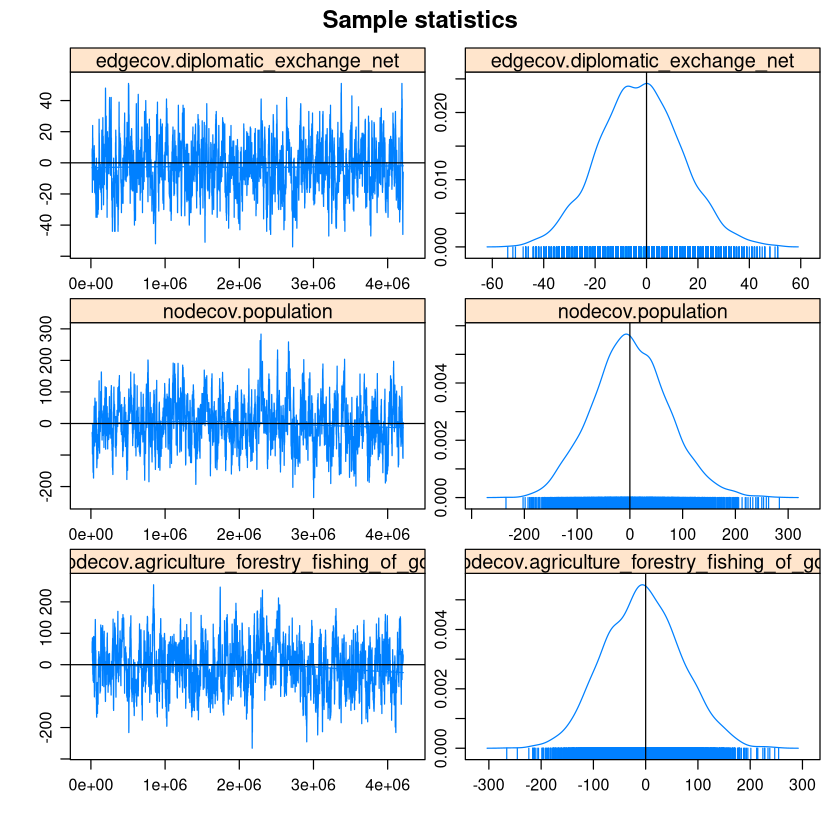

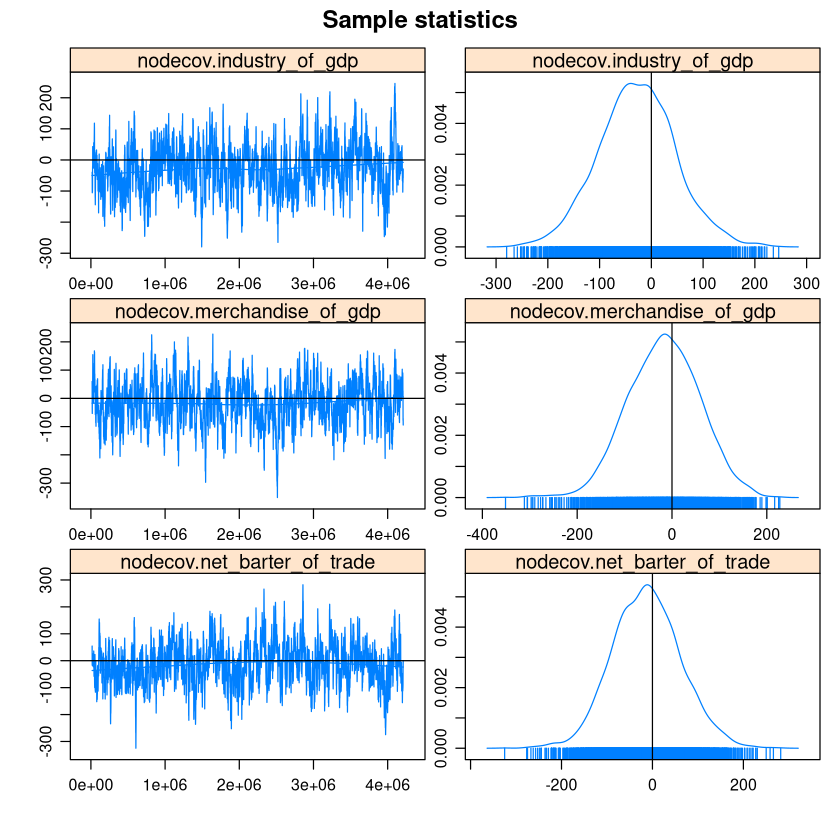


MCMC diagnostics shown here are from the last round of simulation, prior to computation of final parameter estimates. Because the final estimates are refinements of those used for this simulation run, these diagnostics may understate model performance. To directly assess the performance of the final model on in-model statistics, please use the GOF command: gof(ergmFitObject, GOF=~model).


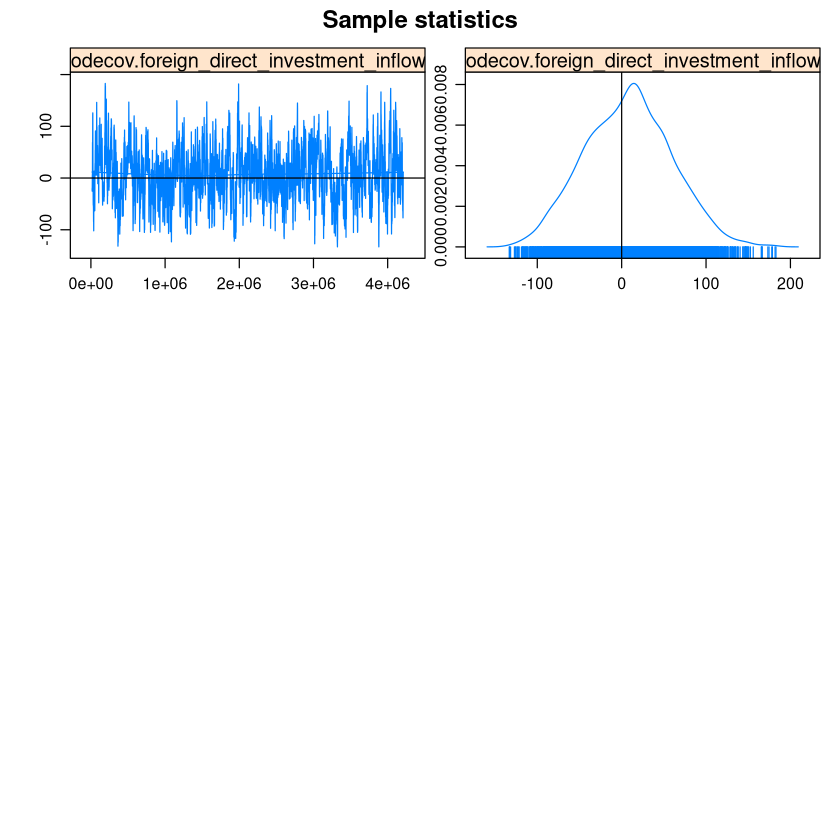

In [13]:
mcmc.diagnostics(model)

### Check correlations

In [14]:
filtered_nl = nl[, !startsWith(colnames(nl), 'scaled') & !startsWith(colnames(nl), 'log')]
nums <- unlist(lapply(filtered_nl, is.numeric))

In [15]:
cor(filtered_nl[, nums])

,gdp_growth,industry_of_gdp,gdp_us_dollar,population,landlocked,merchandise_of_gdp,area,agriculture_forestry_fishing_of_gdp,gdp_per_capita,inflation_rate,net_barter_of_trade,foreign_direct_investment_inflows
gdp_growth,1.000000000,-0.10110173,-0.01073487,0.05921479,0.141315363,0.050183534,0.02087043,0.13411453,-0.10119945,-0.001902714,0.02543716,0.005082295
industry_of_gdp,-0.101101727,1.00000000,0.30628118,0.18908329,-0.021245990,0.206270705,0.29203588,-0.35548748,0.22648339,0.063863167,0.53456520,-0.018599463
gdp_us_dollar,-0.010734869,0.30628118,1.00000000,0.79665829,-0.139580380,-0.019026899,0.64358076,-0.40513025,0.49500833,-0.026464281,0.09666205,0.446589821
population,0.059214794,0.18908329,0.79665829,1.00000000,0.031888981,-0.198573296,0.82987406,0.11137551,-0.12006596,0.203315402,0.15986163,0.311686046
landlocked,0.141315363,-0.02124599,-0.13958038,0.03188898,1.000000000,0.007636278,0.11694445,0.25818783,-0.26517180,0.076999834,0.04902593,-0.113776554
merchandise_of_gdp,0.050183534,0.20627070,-0.01902690,-0.19857330,0.007636278,1.000000000,-0.24429478,-0.29383846,0.24292457,-0.034370635,-0.07114190,0.070591526
area,0.020870426,0.29203588,0.64358076,0.82987406,0.116944454,-0.244294785,1.00000000,0.13515981,-0.12283826,0.221510060,0.32924897,0.204115895
agriculture_forestry_fishing_of_gdp,0.134114532,-0.35548748,-0.40513025,0.11137551,0.258187832,-0.293838463,0.13515981,1.00000000,-0.81321086,0.211693694,0.02065966,-0.194841215
gdp_per_capita,-0.101199446,0.22648339,0.49500833,-0.12006596,-0.265171796,0.242924566,-0.12283826,-0.81321086,1.00000000,-0.326041297,-0.05863353,0.294326378
inflation_rate,-0.001902714,0.06386317,-0.02646428,0.20331540,0.076999834,-0.034370635,0.22151006,0.21169369,-0.32604130,1.000000000,0.20210885,-0.101788350


In [16]:
cor_results = cor(filtered_nl[, nums]) > .6
diag(cor_results) = F

In [17]:
col_names = colnames(cor_results)
temp = matrix('', nrow=length(col_names), ncol = length(col_names))
for (i in 1:length(col_names)) {
    for (j in 1:length(col_names)) {
        temp[i, j] = paste(col_names[i], col_names[j])
    }
}

In [18]:
temp[cor_results]

[1] "population gdp_us_dollar" "area gdp_us_dollar"      
[3] "gdp_us_dollar population" "area population"         
[5] "gdp_us_dollar area"       "population area"